In [12]:
#Below lies useful packages to load

import pandas as pd #data processing (CSV file loading) and dataframes
import numpy as np #for numerical computing (np.arrays)

#Powerful libraries for data-visualization purposes:
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

First, I loaded the CSV files into 3 different DataFrames (consecutively named df_store, df_train, and df_features) using pandas (imported above).

Once my CSV files were loaded into the aforementioned dataframes, I then merged them up into a consolidated dataframe named 'df'.

'df' should be the dataframe on which I proceeded with data exploration, manipulation and visualization.

In [14]:
df_store = pd.read_csv(r'C:\Users\ThinkPad\Desktop\stores.csv')

In [15]:
df_train = pd.read_csv(r'C:\Users\ThinkPad\Desktop\train.csv')

In [16]:
df_features = pd.read_csv(r'C:\Users\ThinkPad\Desktop\features.csv')

In [17]:
df_store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [18]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [19]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [20]:
common_cols1 = df_train.columns.intersection(df_features.columns)
common_cols2 = df_features.columns.intersection(df_store.columns)
print(common_cols1)
print(common_cols2)

Index(['Store', 'Date', 'IsHoliday'], dtype='object')
Index(['Store'], dtype='object')


As above, I displayed the first few rows of each dataframe for observation purpose.

I would merge these dataframes with one another by means of INNER JOIN (on common columns) - in avoidance of irrelevant and/or duplicate data values.

In [22]:
df = df_train.merge(df_features,on=['Store','Date'],how='inner').merge(df_store,on='Store',how='inner')

df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [23]:
#Remove duplicated columns
df.drop(['IsHoliday_y'],axis=1,inplace=True)

In [24]:
#Rename the column
df.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True)

In [25]:
df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


=> The data set has now been ready for further proceedings.

<h2>II. DATA UNDERSTANDING</h2>

This initial step - as known as data exploration, involves getting to know the dataset. This includes gaining a clear understanding of its structure, data types and summary statistics.

In [29]:
#Quickly check the size of the dataset (num. of rows and columns)
print('Shape of the dataframe (rows x columns):',df.shape)

Shape of the dataframe (rows x columns): (421570, 16)


In [30]:
#To 
pd.concat([df['Date'].head(1),df['Date'].tail(1)])

0         2010-02-05
421569    2012-10-26
Name: Date, dtype: object

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [32]:
print(df.columns)

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')


<b>Column-wise Description<b/>

1. Store: denotes the Store Number
2. Dept: denotes the Department Number
3. Data: from 2010-Feb to 2012-Oct
4. Weekly_Sales:
5. IsHoliday: is that particular day holiday or working day
6. Temperature: temperature i Fahrenheit
7. Fuel Price: Price of Fuel that day
8. MarkDown1, MarkDown2, MarkDown3, MarkDown4, MarkDown5: anonymous data relevant to promotional markdowns ar Walmart
9. CPI: Consumer Price Index - which measures monthly change in prices paid by US Consumers
10. Unemployment: Rate of Unemployment
11. Type:
12. Size:

<h2>III. DATA QUALITY CHECKING</h2>

In [35]:
df['Store'].nunique()

45

In [36]:
print(df['Store'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


In [37]:
df['Dept'].nunique()

81

In [38]:
print(sorted(df['Dept'].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 58, 59, 60, 65, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82, 83, 85, 87, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [39]:
dept_numbers=sorted(df['Dept'].unique())

In [40]:
full_range = set(range(min(dept_numbers),max(dept_numbers)+1))

In [41]:
missing_depts = full_range-set(dept_numbers)

In [42]:
print(sorted(missing_depts))

[15, 53, 57, 61, 62, 63, 64, 66, 68, 69, 70, 73, 75, 76, 84, 86, 88, 89]


Deparment numbers are generally arranged in sequential order - akin to store numbers (as above). However, closer observation has revealed gaps in numbering - indicating a break in the expected sequence. 

This irregularity implies that certain departments (as listed above) may have been discontinued - possibily in consequence of inefficiencies in their operations. 

In [44]:
#Change the display settings of the dataframe to show all columns
#when outputting
pd.set_option('display.max_columns',None)

Before any further analysis, I planned to look at the average (mean) Weekly_Sales by Store and Dept to check if there exists any unusual values.

In [46]:
#Display average (mean) weekly sales by distinct Store Num and Dept Num
store_dept_table=pd.pivot_table(df,index='Store',columns='Dept',
                                 values='Weekly_Sales',aggfunc='mean')

store_dept_table = store_dept_table.round(2)
display(store_dept_table)

Dept,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,54,55,56,58,59,60,65,67,71,72,74,77,78,79,80,81,82,83,85,87,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,22513.32,46102.09,13150.48,36964.15,24257.94,4801.78,24566.49,35718.26,28062.05,31033.39,24919.27,10566.55,38692.88,15268.55,24151.06,9196.56,7765.30,1259.02,4091.57,7808.45,8052.08,21623.18,6187.39,10152.34,6768.00,1374.65,593.11,4651.04,3415.30,2408.53,8202.67,5946.43,11530.83,2535.73,1476.20,2800.50,79978.22,NaN,58510.41,1064.77,7940.33,NaN,4872.72,24.00,19662.99,-116.45,917.73,11437.93,NaN,32.71,2355.44,90.92,12817.84,4000.48,3372.47,857.78,1021.00,NaN,7436.02,2732.47,47390.64,11652.83,677.00,11.50,33974.79,17139.31,29780.70,20727.86,5704.05,3685.88,46006.28,82427.55,64238.94,135458.97,71699.18,63180.57,120772.06,33251.83,35207.35,11827.77,306.09
2,30777.98,65912.92,17476.56,45607.67,30555.32,6808.38,40477.84,58707.37,34375.86,38845.85,23382.69,7735.95,46117.96,21314.13,27005.18,13790.85,11687.56,4053.44,5748.62,9910.94,12923.01,29170.62,8309.56,15299.51,9347.73,1837.95,798.91,7111.48,4981.16,3884.76,11755.10,7488.10,17595.20,3875.59,2631.75,4500.25,85115.00,2.34,78174.56,2592.22,8768.86,NaN,7245.54,29.14,29675.32,18.07,1358.35,15568.47,NaN,16.23,4148.37,104.50,13060.30,5545.12,21610.02,1391.52,221.55,NaN,12125.26,4634.61,72929.50,16986.41,817.50,11.76,32759.10,26041.27,31000.48,24647.23,5710.72,3672.04,24932.99,97611.54,80610.38,164840.23,70581.98,70018.67,143588.75,34319.06,40697.20,14035.40,475.90
3,7328.62,16841.78,5509.30,8434.19,11695.37,2012.41,10044.34,8310.25,9062.01,10871.94,8774.93,2383.60,11363.06,4626.65,7871.57,2634.20,2960.68,731.31,1682.20,1244.53,3101.77,10913.33,2763.63,4260.45,2850.05,500.19,166.87,1517.40,1243.93,878.48,4296.11,3228.16,4579.72,1439.33,622.69,NaN,108598.36,NaN,18203.11,646.83,4422.94,NaN,2133.66,9.92,6179.26,38.88,NaN,17.58,NaN,5.41,961.39,58.31,7153.74,1606.81,NaN,244.88,138.13,NaN,2021.48,1101.61,22796.86,3374.96,424.00,6.00,7230.37,24.42,1429.30,6746.58,19.33,874.13,939.44,1540.05,318.69,7568.28,NaN,656.29,15745.53,3934.54,343.44,30.57,NaN
4,36979.94,93639.32,19012.49,56603.40,45668.41,8241.78,50728.15,62949.72,34437.17,37269.67,27145.84,8141.91,69596.45,28567.51,21270.15,15815.88,13146.54,3038.32,8888.30,8865.27,17289.92,46234.01,10875.30,15640.75,18429.76,2579.91,916.23,9472.12,7683.69,3813.24,13685.43,12304.06,25142.68,4376.57,3005.23,3640.75,80093.95,1.56,78729.26,975.42,9511.82,NaN,5441.56,13.70,39128.90,23.54,2324.62,6911.68,NaN,8.20,3721.52,131.89,18662.63,6040.54,6078.14,1586.45,410.80,NaN,12471.43,7686.02,101244.45,20627.31,344.57,5.38,52436.66,19379.10,31055.29,29371.32,9161.22,2730.06,14223.46,89248.97,66535.41,159365.11,67815.16,68159.11,147236.47,38346.57,39339.24,15009.25,623.18
5,9774.55,12317.95,4101.09,9860.81,6699.20,1191.06,6124.48,13735.71,7919.81,9783.40,7389.05,2515.35,11242.66,3697.42,7717.57,2396.78,2185.89,46.33,1220.83,1316.41,2430.05,6141.86,1480.23,2685.58,1782.21,377.29,203.28,1343.72,857.15,655.45,2450.90,1598.76,3602.76,1162.08,587.06,NaN,55199.79,NaN,19328.99,524.75,2932.12,NaN,1317.44,18.59,4895.63,38.73,NaN,39.14,NaN,6.68,530.81,45.92,3445.10,1220.32,871.18,78.26,236.53,NaN,3036.86,456.66,11656.52,3523.77,465.08,6.00,5009.17,6.08,2615.84,3887.79,NaN,935.08,10089.58,3059.52,1457.22,7759.21,NaN,411.43,19340.69,5985.67,667.07,29.98,NaN
6,23867.55,50269.44,16806.64,34187.37,34465.31,7225.57,34526.87,47577.72,48271.06,47436.48,21882.12,6683.22,37746.93,25583.74,28204.01,16296.99,11500.90,2585.30,9299.86,9398.61,18833.15,30538.91,6789.38,13777.69,9098.64,1798.56,578.54,6858.09,5020.27,3248.54,11369.83,7213.95,18101.45,3551.45,3456.01,3911.77,78545.20,NaN,65833.73,2641.54,9399.42,NaN,7780.47,39.01,27602.17,-42.02,1779.87,12496.31,NaN,31.23,4208.44,156.99,16407.80,6530.88,2993.47,1016.75,295.86,NaN,11701.16,5752.10,80187.18,21902.68,625.

As can be seen in the Pivot Table, there exists erroneous values - specifically minus values and NA values for weekly sales. 

There's no possibility that a department would have no sales/ minus sales for an entire week. Hence, these row values should be excluded from the dataframe to ensure greater accurary of the analysis.

<h2>IV. Data Cleaning and Transformation</h2>

In [49]:
df.loc[df['Weekly_Sales']<=0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
846,1,6,2012-08-10,-139.65,False,85.05,3.494,11436.22,245.0,6.85,6964.26,4836.22,221.958433,6.908,A,151315
2384,1,18,2012-05-04,-1.27,False,75.55,3.749,21290.13,NaN,69.89,4977.35,3261.04,221.671800,7.143,A,151315
6048,1,47,2010-02-19,-863.00,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
6049,1,47,2010-03-12,-698.00,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,A,151315
6051,1,47,2010-10-08,-58.00,False,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419597,45,80,2010-02-12,-0.43,True,27.73,2.773,NaN,NaN,NaN,NaN,NaN,181.982317,8.992,B,118221
419598,45,80,2010-02-19,-0.27,False,31.27,2.745,NaN,NaN,NaN,NaN,NaN,182.034782,8.992,B,118221
419603,45,80,2010-04-16,-1.61,False,54.28,2.899,NaN,NaN,NaN,NaN,NaN,181.692477,8.899,B,118221
419614,45,80,2010-07-02,-0.27,False,76.61,2.815,NaN,NaN,NaN,NaN,NaN,182.318780,8.743,B,118221


In [50]:
df=df.loc[df['Weekly_Sales']>0]

In [51]:
df.shape

(420212, 16)

1,358 rows (0.3% of the whole dataset) with minus Weekly Sales data have been removed. Such removal should not exert any influence on the accuracy of the analysis.

In [53]:
##### Check for missing values 
df.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270031
MarkDown2       309308
MarkDown3       283561
MarkDown4       285694
MarkDown5       269283
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

-> All missing values are found in the MarkDown columns (5 columns). This - however, does not affect the accuracy of the analysis - as there's a general expectation that not all markdowns will have non-null values. Instead, this reflects such a normal operation in Retail Sales - where markdowns serve as a strategic solution for clearing end-of-season products or slow-moving items. 

The main priority at this stage is to ensure that all values in these Markdown columns are of float type (not strings) for the purpose of later correlation analysis. 

In [55]:
for i in range(1, 6):
    df[f'MarkDown{i}'] = df[f'MarkDown{i}'].replace('NA', np.nan).astype(float)

In [56]:
#Check for duplicates
df.duplicated(keep='first').sum()

0

-> At first glance, this dataset proves itself to be of high-quality. It has a substantial number of records (420212 rows x 16 columns) and no significant issue with duplicates or missing data.

In [58]:
#Convert 'Date' column into Pandas datetime objects
#This enables various date-related operations later
df['Date'] = pd.to_datetime(df['Date'])

#Create separate columns for Month and Year
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

<h2>V. Descriptive Analytics & Visualizations</h2>

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420212 entries, 0 to 421569
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         420212 non-null  int64         
 1   Dept          420212 non-null  int64         
 2   Date          420212 non-null  datetime64[ns]
 3   Weekly_Sales  420212 non-null  float64       
 4   IsHoliday     420212 non-null  bool          
 5   Temperature   420212 non-null  float64       
 6   Fuel_Price    420212 non-null  float64       
 7   MarkDown1     150181 non-null  float64       
 8   MarkDown2     110904 non-null  float64       
 9   MarkDown3     136651 non-null  float64       
 10  MarkDown4     134518 non-null  float64       
 11  MarkDown5     150929 non-null  float64       
 12  CPI           420212 non-null  float64       
 13  Unemployment  420212 non-null  float64       
 14  Type          420212 non-null  object        
 15  Size          420212 n

In [61]:
#Mean Weekly Sales by Year
df.groupby('Year')['Weekly_Sales'].mean()

Year
2010    16318.648285
2011    16007.797985
2012    15748.265005
Name: Weekly_Sales, dtype: float64

In [62]:
#Mean Weekly Sales by Month
df.groupby('Month')['Weekly_Sales'].mean()

Month
1     14182.239153
2     16048.701191
3     15464.817698
4     15696.435193
5     15845.556200
6     16397.605478
7     15905.472425
8     16113.800069
9     15147.216063
10    15279.182119
11    17534.964277
12    19425.798603
Name: Weekly_Sales, dtype: float64

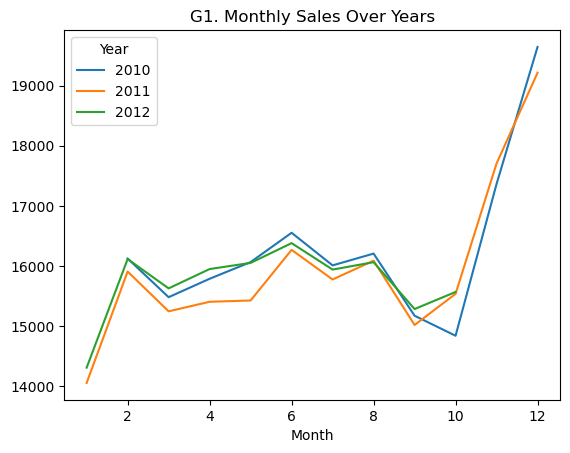

In [63]:
monthly_sales = pd.pivot_table(df, values = 'Weekly_Sales', columns = 'Year', index = 'Month')
monthly_sales.plot(title='G1. Monthly Sales Over Years');

To begin with, I should examine the correlation bewteen numericals variables and Weekly Sales to determine if any of these variables impact Walmart's sales performance.

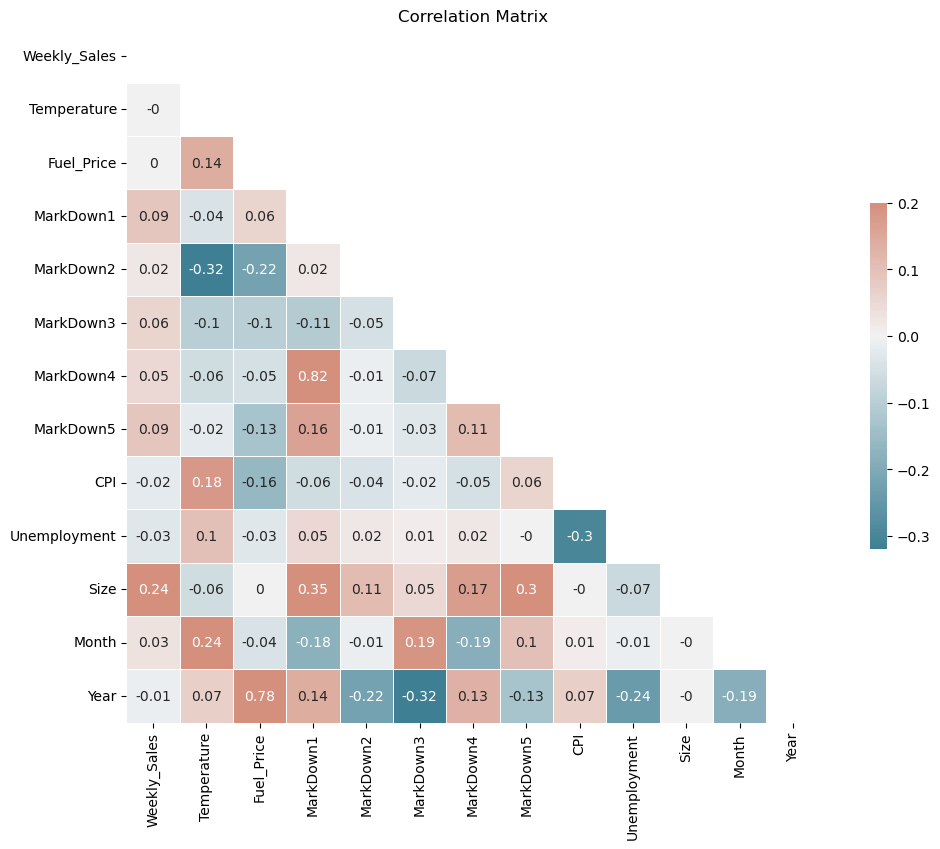

In [65]:
#Exclude categorical (Store & Dept) and non-numeric columns (Type, IsHoliday)
num_cols = [x for x in df.columns if x not in ['Store','Date','Dept','Type','IsHoliday']]

#Compute the correlation matrix for the selected numerical columns
corr = df[num_cols].corr().round(2)

#Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr,dtype=bool))

#Set up the matplotlib figure
fig, axes = plt.subplots(figsize=(13,9))

#Customize a diverging color map
cmap = sns.diverging_palette(220,20,as_cmap=True)

#Draw the heatmap in coherence with the mask and the aspect ratio specified
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.2, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix')
plt.show()

-> The correlation between Weekly Sales and other numerical variables is trivial - with a maximum correlation of just 0.09. 

This actuality suggests that there exists no linear relationship between these numerical variables and Weekly Sales. In other words, these variables do not constitute reliable predictors of Walmart's sales trends.

Other factors - possibly categorical ones or external influences - may exert a more significant influence on driving weekly sales. 

This has led me to the next phase of analysis: <b>examining the impact of categorical factors on sales</b>

For the purpose of ensuring a comprehensive understanding, the ensuing analysis examines the impact of 5 key factors - [Dates], [IsHoliday], [Type], [Dept], and [Store] - on Weekly Sales Performance:

<h3>1. How Dates (Holiday vs Non-holiday) influence Weekly Sales Performance</h3>

In [69]:
df['Date'].head()

0   2010-02-05
1   2010-02-12
2   2010-02-19
3   2010-02-26
4   2010-03-05
Name: Date, dtype: datetime64[ns]

In [70]:
df['Date'] = pd.to_datetime(df['Date'])

In [71]:
print(df['Date'].dtype)

datetime64[ns]


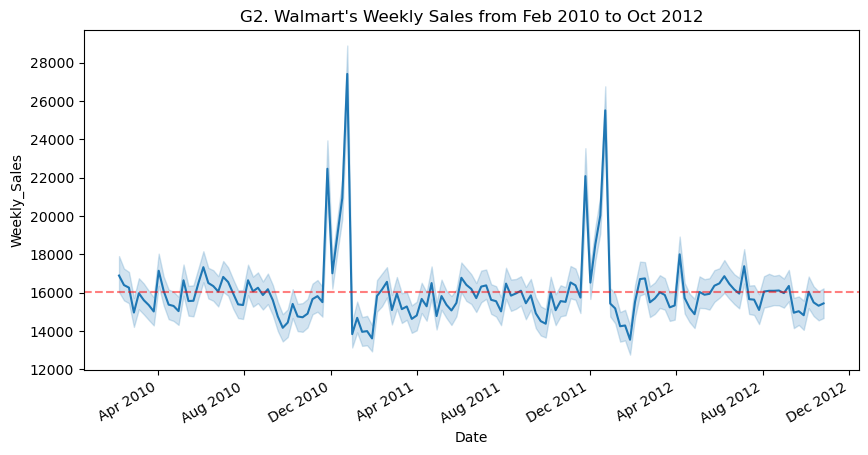

In [72]:
#Set the figure size
plt.figure(figsize=(10,5))

#Create the lineplot for Weekly Sales over time
sns.lineplot(data=df, x=df['Date'], y=df['Weekly_Sales'])

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=4))  # Set the interval to 1 month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

#Set the title for the plot
plt.title(f"G2. Walmart's Weekly Sales from Feb 2010 to Oct 2012")

#Add a horizontal line representing the mean (avg) weekly sales
plt.axhline(df['Weekly_Sales'].mean(),color='r',alpha=0.5,linestyle='--')

plt.gcf().autofmt_xdate()

#Display the plot
plt.show()

<b>Key observations<b/>

<li><b>Holiday Spikes:</b> As can be seen, there has been a noticeable increase in sales during the holiday seasons each year - specifically in November and December.</li>
<li><b>Sales Peak in 2011:</b> Holiday Sales reached its peak in Jan 2011, remarkably surpassing those of other years.</li>
<li><b>Average (mean) Sales:</b> Except for holiday seasons, monthly sales consistently averaged around $16,000. </li>

In [74]:
#Sort out the specific holiday dates
df_holiday = df.loc[df['IsHoliday']==True]
df_holiday['Date'].unique().date

array([datetime.date(2010, 2, 12), datetime.date(2010, 9, 10),
       datetime.date(2010, 11, 26), datetime.date(2010, 12, 31),
       datetime.date(2011, 2, 11), datetime.date(2011, 9, 9),
       datetime.date(2011, 11, 25), datetime.date(2011, 12, 30),
       datetime.date(2012, 2, 10), datetime.date(2012, 9, 7)],
      dtype=object)

-> These holiday dates fall into 4 seperate categories:
<ol>Super Bowl: 2010-Feb-12, 2011-Feb-11, 2012-Feb-10</ol>
<ol>Labor Day: 2010-Sep-10, 2011-Sep-09, 2012-Sep-07</ol>
<ol>Thanksgiving: 2010-Nov-26, 2011-Nov-25</ol>
<ol>Christmas: 2010-Dec-31, 2011-Dec-30</ol>

Next, I aimed to comapre Weekly Sales on non-holiday dates with these on each holiday occation individually - to determine if sales on those days significantly exceed those on non-holiday dates.

<h4>Weekly Sales: Non-Holiday vs Super Bowl</h4>

In [78]:
super_bowl_dates = pd.to_datetime(['2010-02-12','2011-02-11', '2012-02-10'])

df['Date']=pd.to_datetime(df['Date'])
df['Super_Bowl'] = df['Date'].isin(super_bowl_dates)

As below, I  excluded rows with specific holiday dates from the dataframe to ensure that they would neither skew the accuracy of my analyses nor conbine with non-holiday data before charting.

The same methodology should as well be employed for subsequent charts comparing weekly sales between non-holiday and a specific holiday occasion.

In [80]:
#Exclude other holiday dates (including Labor Day, Thanksgiving & Christmas)
other_holiday_dates = pd.to_datetime(['2010-09-10','2011-09-09','2012-09-07',
                                     '2010-11-26','2011-11-25','2010-12-31',
                                     '2011-12-30'])
df_filter_superbowl = df.loc[~df['Date'].isin(other_holiday_dates)]

In [81]:
df_filter_superbowl.shape

(399525, 19)

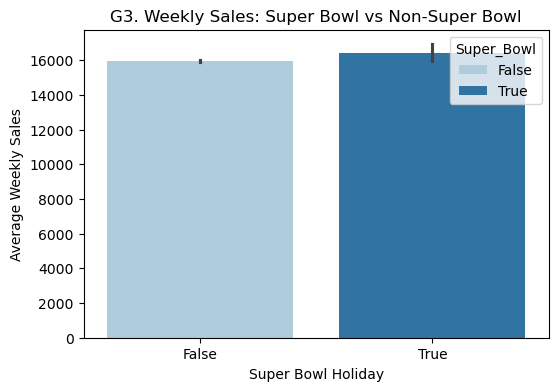

In [82]:
sns.set_palette('Paired')

plt.figure(figsize=(6,4))

sns.barplot(x='Super_Bowl', y='Weekly_Sales', hue='Super_Bowl', data=df_filter_superbowl)

plt.title('G3. Weekly Sales: Super Bowl vs Non-Super Bowl')
plt.xlabel('Super Bowl Holiday')
plt.ylabel('Average Weekly Sales')

plt.show()

<h4>Weekly Sales: Non-Holiday vs Labor Day</h4>

In [84]:
labor_dates = pd.to_datetime(['2010-09-10','2011-09-09','2012-09-07'])

df['Labor_Day'] = df['Date'].isin(labor_dates)

In [85]:
#Exclude other holiday dates (including Super Bowl, Thanksgiving & Christmas)
other_holiday_dates_1 = pd.to_datetime(['2010-02-12','2011-02-11', '2012-02-10',
                                     '2010-11-26','2011-11-25','2010-12-31',
                                     '2011-12-30'])
df_filter_laborday = df.loc[~df['Date'].isin(other_holiday_dates_1)]

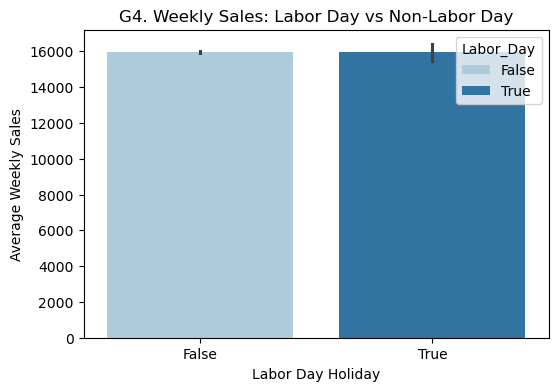

In [86]:
sns.set_palette('Paired')

plt.figure(figsize=(6,4))

sns.barplot(x='Labor_Day', y='Weekly_Sales', hue='Labor_Day', data=df_filter_laborday)

plt.title('G4. Weekly Sales: Labor Day vs Non-Labor Day')
plt.xlabel('Labor Day Holiday')
plt.ylabel('Average Weekly Sales')

plt.show()

<h4>Weekly Sales: Non-Holiday vs Thanksgiving</h4>

In [88]:
thanksgiving_dates = pd.to_datetime(['2010-11-26','2011-11-25'])

df['Thanksgiving'] = df['Date'].isin(thanksgiving_dates)

In [89]:
#Exclude other holiday dates (including Super Bowl, Labor Day & Christmas)
other_holiday_dates_2 = pd.to_datetime(['2010-02-12','2011-02-11', '2012-02-10',
                                        '2010-09-10','2011-09-09','2012-09-07',
                                        '2010-12-31','2011-12-30'])
df_filter_thanksgiving = df.loc[~df['Date'].isin(other_holiday_dates_2)]

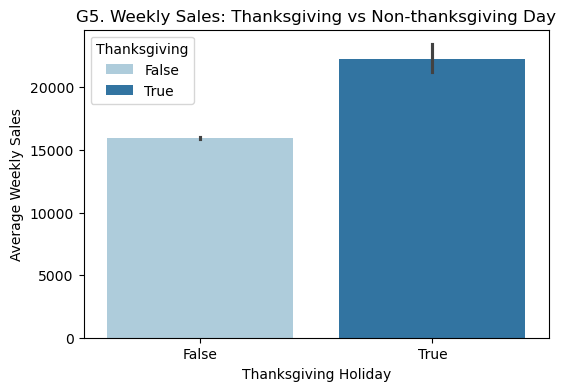

In [90]:
sns.set_palette("Paired")

plt.figure(figsize=(6,4))

sns.barplot(x='Thanksgiving', y='Weekly_Sales', hue='Thanksgiving', data=df_filter_thanksgiving)

plt.title('G5. Weekly Sales: Thanksgiving vs Non-thanksgiving Day')
plt.xlabel('Thanksgiving Holiday')
plt.ylabel('Average Weekly Sales')

plt.show()

<h4>Weekly Sales: Non-Holiday vs Christmas</h4>

In [92]:
christmas_dates = pd.to_datetime(['2010-12-31','2011-12-30'])

df['Christmas'] = df['Date'].isin(christmas_dates)

In [93]:
#Exclude other holiday dates (including Super Bowl, Labor Day & Christmas)
other_holiday_dates_3 = pd.to_datetime(['2010-02-12','2011-02-11', '2012-02-10',
                                        '2010-09-10','2011-09-09','2012-09-07',
                                        '2010-11-26','2011-11-25'])
df_filter_christmas = df.loc[~df['Date'].isin(other_holiday_dates_3)]

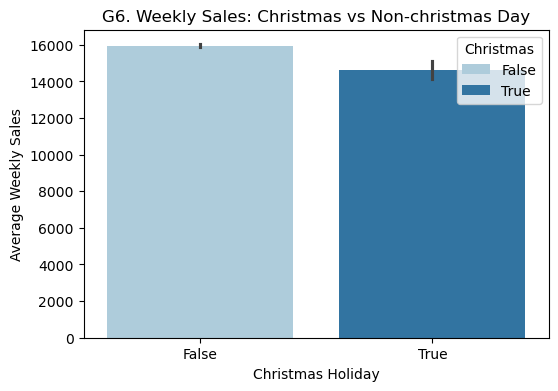

In [94]:
sns.set_palette("Paired")

plt.figure(figsize=(6,4))

sns.barplot(x='Christmas', y='Weekly_Sales', hue='Christmas', data=df_filter_christmas)

plt.title('G6. Weekly Sales: Christmas vs Non-christmas Day')
plt.xlabel('Christmas Holiday')
plt.ylabel('Average Weekly Sales')

plt.show()

<b>Conclusion drawn from the above graphs:<b/>
<ol>
<li>Neither Labor Day nor Christmas witnessed an increase in average Weekly Sales. Chances are that there was a tendency of consumers to purchase Christmas gifts one or two weeks in advance of the holiday - resulting in no notable sales changes during the Christmas week.</li>
<li>Super Bowl had a posisitive - yet negligible impact on sales.</li>
<li>The most significant increase was observed during Thanksgiving. There is a strong likelihood that Black Friday sales were the key contributor to the sales enhancement during the Thanksgiving period. </li>
</ol>

<h3>2. How Types influences Weekly Sales Performance</h3>

In [97]:
#Display the unique values of Type column
print(df['Type'].unique())

['A' 'B' 'C']


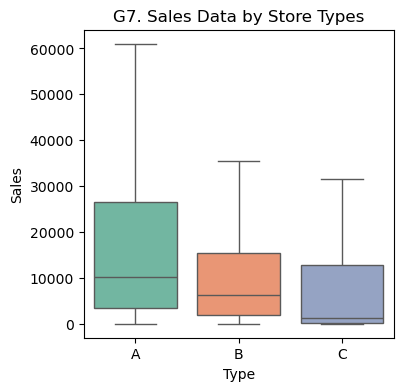

In [98]:
#Visualize the distribution of Weekly Sales for different store types
plt.figure(figsize=(4,4))
sns.boxplot(data=df, x='Type', y='Weekly_Sales',hue='Type', palette='Set2',
            showfliers=False).set_title('G7. Sales Data by Store Types')
plt.ylabel('Sales')
plt.show()

<b>All three box plots are right-skewed (positive skewed), which implies:<b/>

<ol>
    <li>All three stores witnessed a few more extreme sales values
    (outliers) that have driven the distribution towards the right.</li>
    <li>Stores of Type A recorded considerably higher sales - compared to
    those of Type B and Type C.</li>
    <li>Median is closer to the bottom of the box Q1 (in all 3 boxplots),
    indicating that more data points are clustered at the lower end of
    the distribution.</li>
</ol>

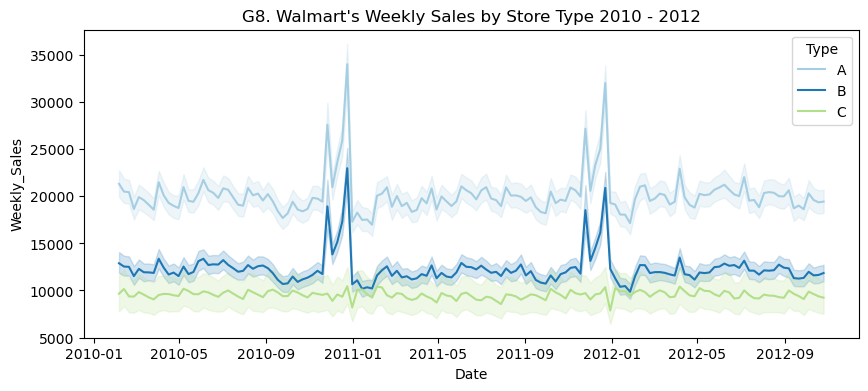

In [100]:
#Weekly Sales by Store Type over time
plt.figure(figsize=(10,4))

sns.lineplot(data=df, x='Date', y='Weekly_Sales', 
             hue='Type').set_title(f"G8. Walmart's Weekly Sales by Store Type 2010 - 2012")
plt.show()

Store of Type A consistently demonstrated  higher sales in the line plot (G7), and both a higher median and a wider range in the box plot (G6). This actuality has - hence, reinforced my presumption: <b style="color:red"><i>Stores of Type A generally outperformed those of Type B and C in terms of Sales Performance<b/></i>.

<h3>3. Weekly Sales Performance by Department</h3>

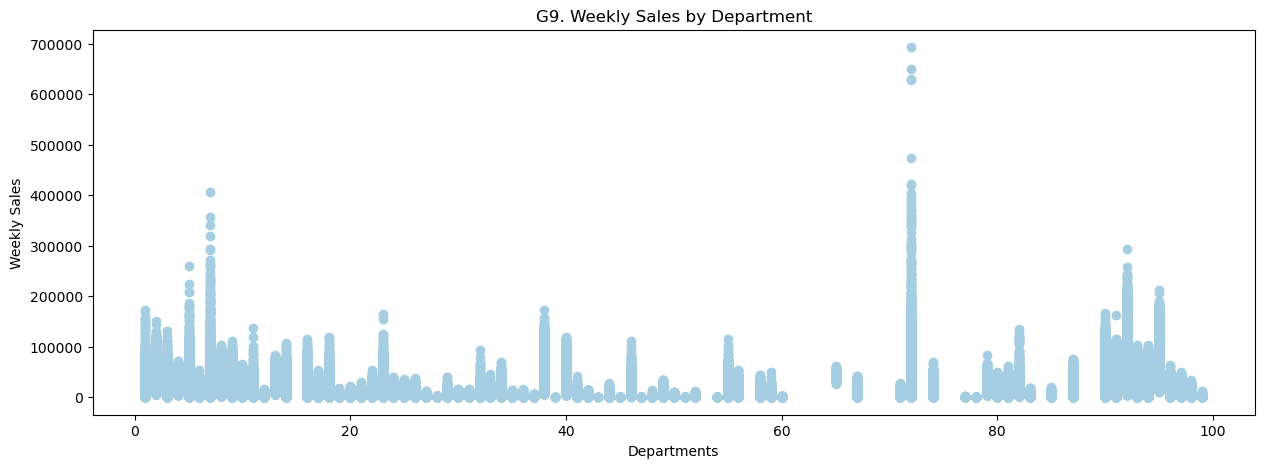

In [103]:
#Scatter plot of Weekly Sales by Department

x = df['Dept']
y = df['Weekly_Sales']

plt.figure(figsize=(15,5))
plt.title('G9. Weekly Sales by Department')
plt.xlabel('Departments')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)

plt.show()

The above scatter plot (G9) presents an overall view of the spread and outliers. It suggests that a department between 60-80 (possibly department 72) witnessed noticable spikes. 

The question arises as to whether this department constitutes the primary contributor to Walmart's overall sales figures?

-> A barplot would effectively addresss this inquiry.

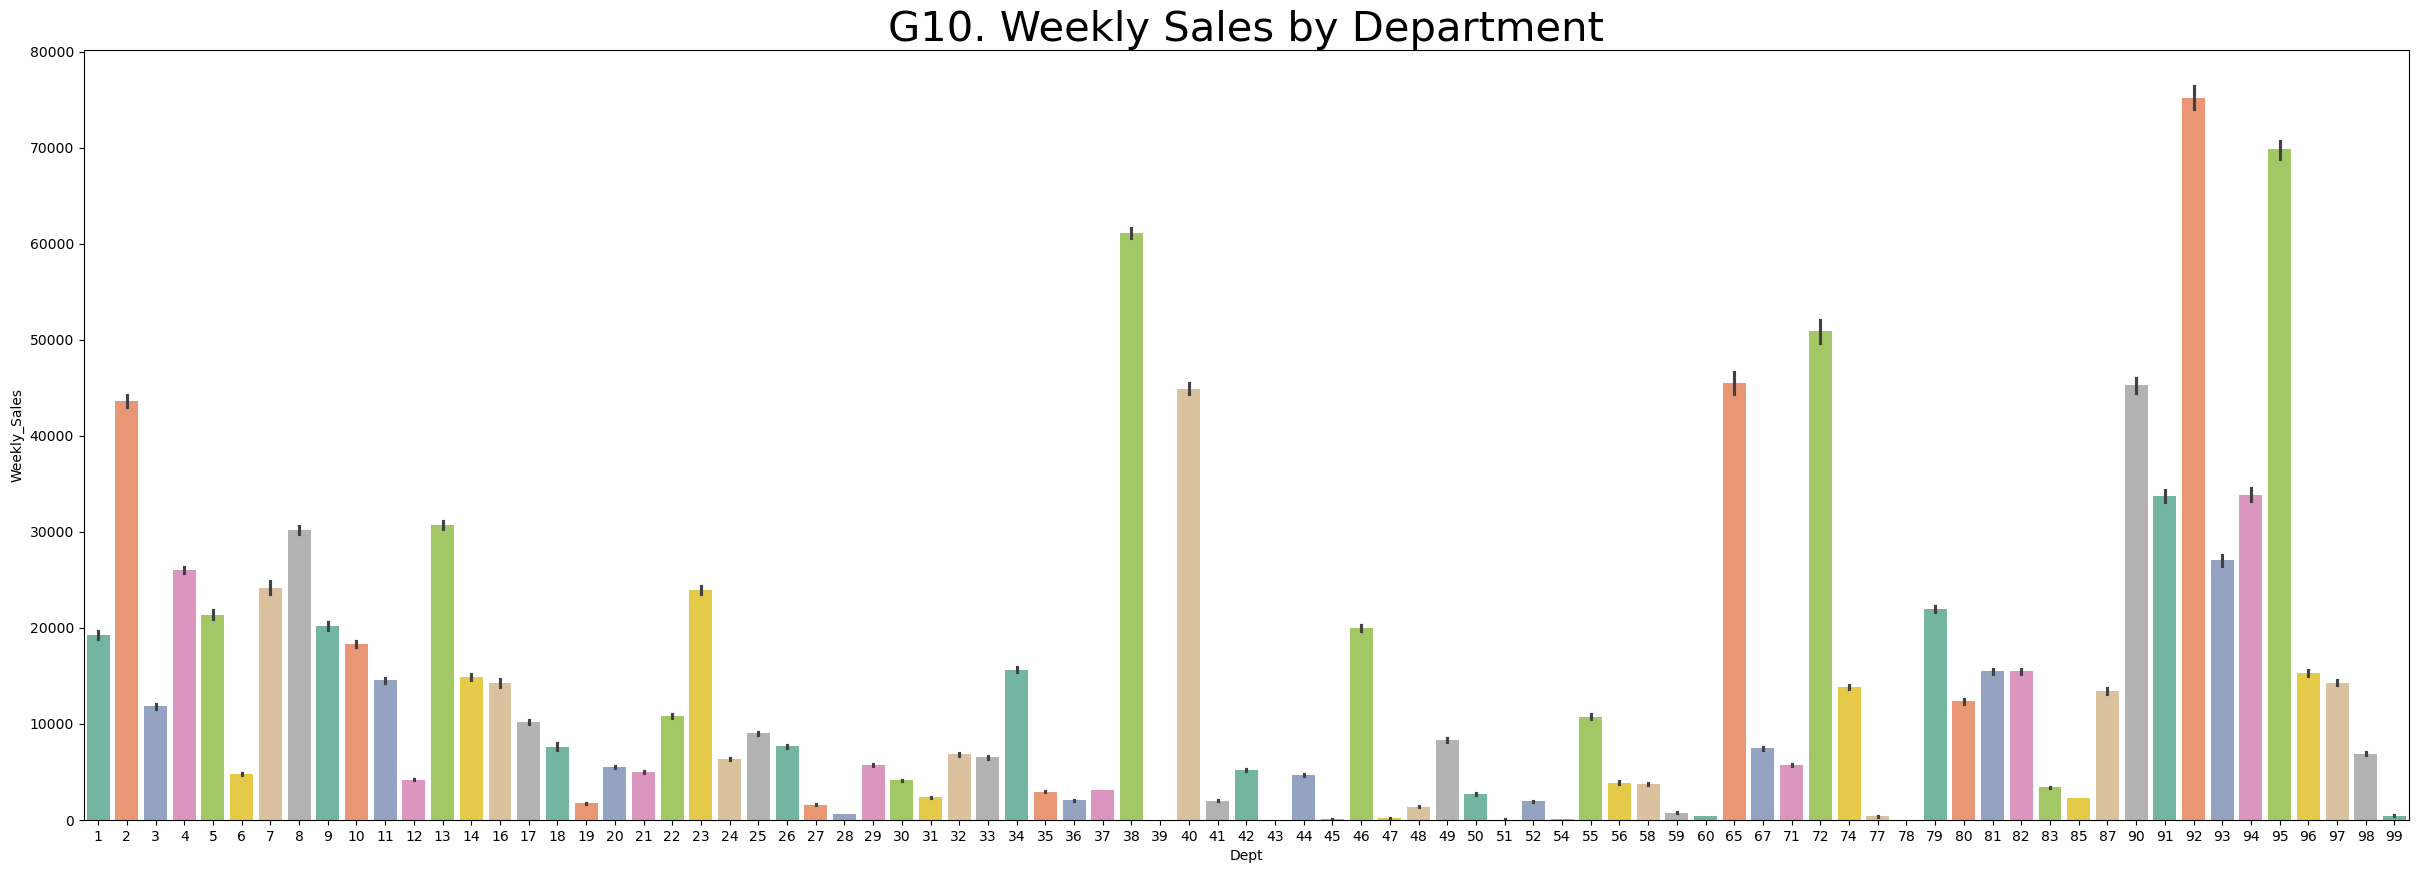

In [105]:
plt.figure(figsize=(30,10))
fig = sns.barplot(x='Dept', y='Weekly_Sales', hue='Dept', palette='Set2', 
                  legend=False,data=df)

plt.title('G10. Weekly Sales by Department', fontsize=30);

This bar chart (G10) visualizes the same data as in G9 but in the form of bars - making it much easier to compare sales by department. 

<li>On the contrary to my presumption above, department 92 exhibits the highest mean sales performance - rather than department 72.</li> 
<li>Some other departments (such as 38, 65, 72, 90, 95) also stand out with significant sales than their counterparts.</li>
<li>On the basis of its wide distribution (as in G8) and relatively substantial sales (as in G9), it is plausible to conclude that 72 constitutes a seasonal department. </li>

<h3>Weekly Sales Performance by Store</h3>

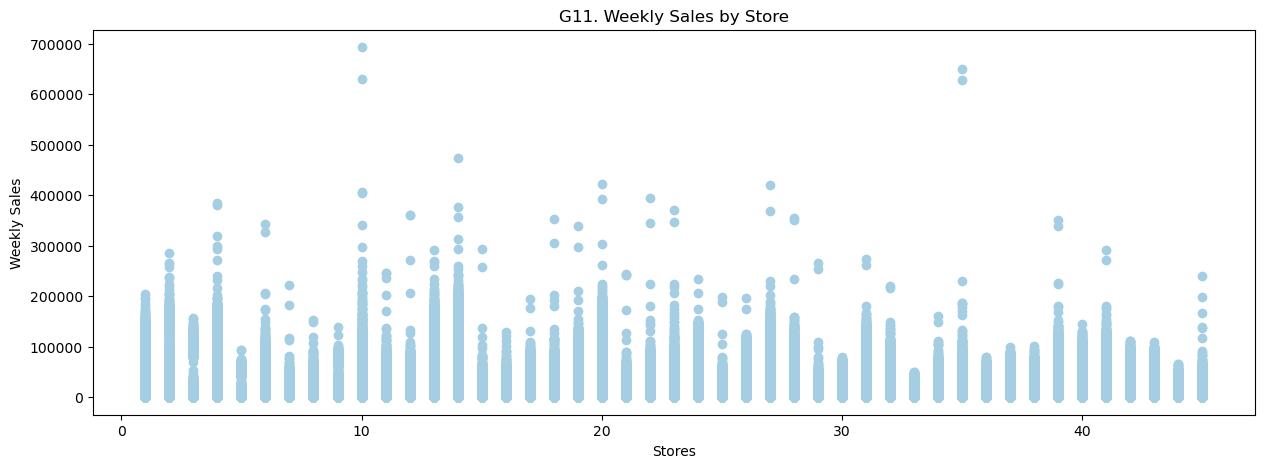

In [108]:
#Scatter plot of Weekly Sales by Store

x = df['Store']
y = df['Weekly_Sales']

plt.figure(figsize=(15,5))

plt.title('G11. Weekly Sales by Store')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

The above scatter plot (G11) reveals significant variability in weekly sales of certain stores - especially those between Store 10 and Store 20. This could be attributed to seasonal effects, promotions, and other factors effacting those specific weeks. 

On the other hand, other stores sustained a more consistent sales level (with less spread in scatter points) - indicating a relatively stable customer base and steadly demand.

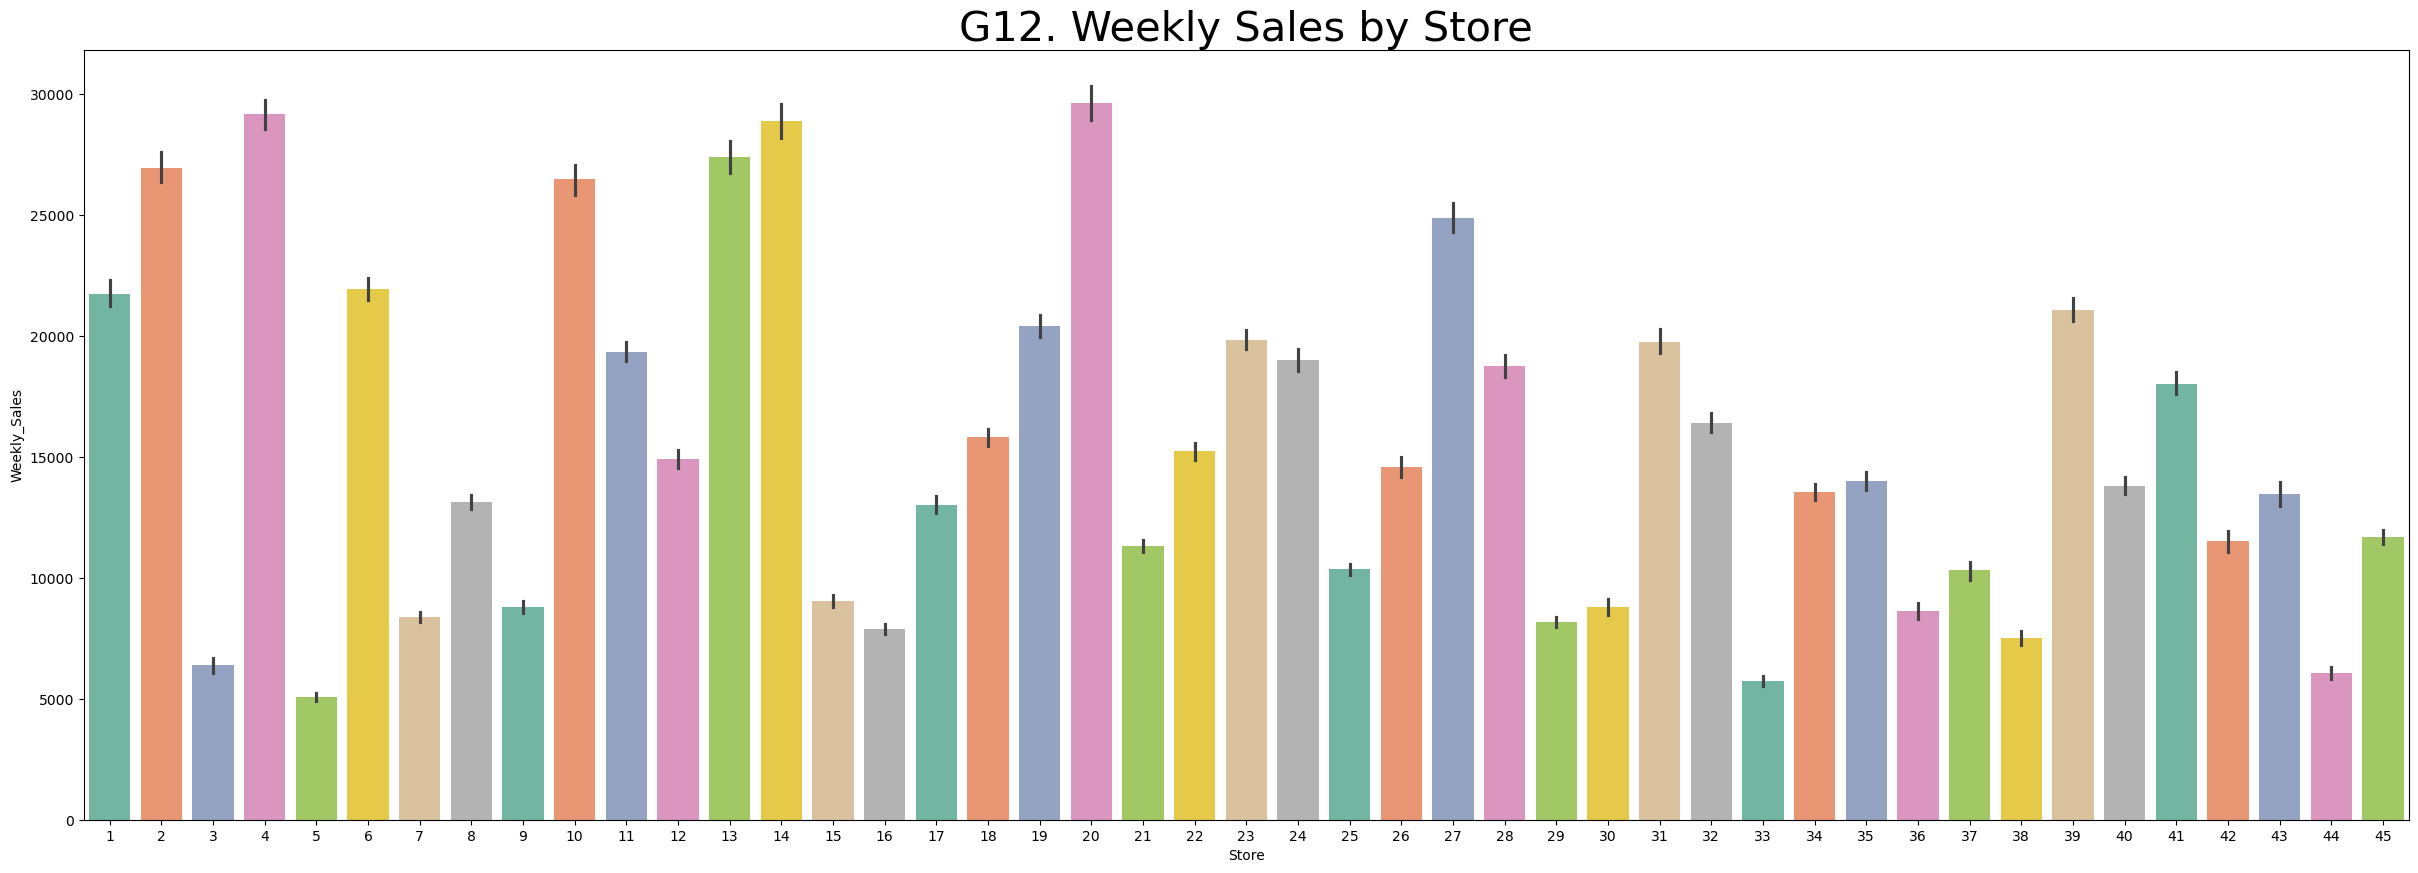

In [110]:
plt.figure(figsize=(30,10))

fig = sns.barplot(x='Store', y='Weekly_Sales', hue='Store', palette='Set2', 
                  legend=False,data=df)

plt.title('G12. Weekly Sales by Store', fontsize=30);

This graph (G12) provides a good comparative view of Weekly Sales by Stores. This should be useful for spotting potential weekly patterns or anomalies in sales across all stores. 

<h2>VI. Key Findings</h2>